In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load data frame
df = pd.read_csv('profiles.csv')

In [3]:
#exploring data

#df.head()
#df.offspring.head()
#df.essay0.value_counts()

In [4]:
features_to_remove = ['body_type','sex','job','age','diet','drugs','education','income','ethnicity','height', 'orientation', 'status', 'location','sign','pets','religion','smokes','drinks','speaks', 'last_online']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [5]:
#create labels to predict (wants kids: 1, doesn't want kids : 0)

df.loc[df['offspring'] == 'doesn&rsquo;t have kids, but wants them', 'offspring_label'] = 1
df.loc[df['offspring'] == 'wants kids', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has a kid, and wants more', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has kids, and wants more', 'offspring_label'] = 1


df.loc[df['offspring'] == 'doesn&rsquo;t want kids', 'offspring_label'] = 0
df.loc[df['offspring'] == 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has kids, but doesn&rsquo;t want more', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has kids, and wants more', 'offspring_label'] = 0


df.offspring_label.value_counts()

0.0    4522
1.0    3861
Name: offspring_label, dtype: int64

In [6]:
#drop nans (rows where offspring answer = might want kids or no answer)
df.dropna(axis = 0, subset = ['offspring_label'], inplace = True) 
 
df.fillna({'essay0': '',
           'essay1': '',
          'essay2': '',
          'essay3': '',
          'essay4': '',
          'essay5': '',
          'essay6': '',
          'essay7': '',
          'essay8': '',
          'essay9': ''
          },
          inplace=True)

In [7]:
# check to make sure there's no more nans in essays
#df.isna().any()


In [8]:
#amount of rows used for classifier after cleaning data
#len(df['offspring_label'])

In [9]:
#top_essays() : Trains each individual essay separately and then puts accuracy, precision and recall score in df
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def top_essays(essay):
    labels = df['offspring_label']
    precision = []
    recall = []
    accuracy = []
    f1 = []
    for essay in data:
        train_data, test_data, train_labels, test_labels = train_test_split(essay, labels, test_size = 0.2, random_state = 1)
        counter = CountVectorizer()
        
        counter.fit(train_data, test_data)
        train_counts = counter.transform(train_data)
        test_counts = counter.transform(test_data)
        
        classifier = MultinomialNB()
        classifier.fit(train_counts, train_labels)
        predictions = classifier.predict(test_counts)
        
        accuracy.append(accuracy_score(test_labels, predictions))
        precision.append(precision_score(test_labels, predictions))
        recall.append(recall_score(test_labels, predictions))
        f1.append(f1_score(test_labels, predictions))
        scores = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}
        score_df = pd.DataFrame(data=scores)
        
    return score_df




In [10]:
data = [df['essay0'], df['essay1'], df['essay2'], df['essay3'], df['essay4'], df['essay5'], df['essay6'], df['essay7'], df['essay8'], df['essay9']]
#use top_essays function on all essays 
top_essays(data)

,Accuracy,Precision,Recall,F1
0,0.643411,0.587553,0.729058,0.650701
1,0.597496,0.553166,0.606021,0.578389
2,0.574836,0.532819,0.541885,0.537313
3,0.552177,0.509326,0.464660,0.485969
4,0.596899,0.543222,0.723822,0.620651
5,0.629100,0.587871,0.621728,0.604326
6,0.560525,0.517787,0.514398,0.516087
7,0.571258,0.529032,0.536649,0.532814
8,0.525343,0.464286,0.272251,0.343234
9,0.571258,0.530364,0.514398,0.522259


In [11]:
#according to scores_df in top_essays, these are the top 3 essays for each type of score
best_acc = df['essay5'] + df['essay0'] + df['essay4']
best_precision = df['essay5'] + df['essay0'] + df['essay1']
best_recall = df['essay0'] + df['essay4'] + df['essay5']
best_f1 = df['essay0'] + df['essay4'] + df['essay5']

In [12]:
 #runinng new classifier with only best_f1 essays
from sklearn.model_selection import train_test_split
labels = df['offspring_label']
train_data, test_data, train_labels, test_labels = train_test_split(best_f1, labels, test_size = 0.2, random_state = 1)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
counter.fit(train_data, test_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)
#%timeit classifier.predict(test_counts)

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, predictions))

[[441 472]
 [111 653]]


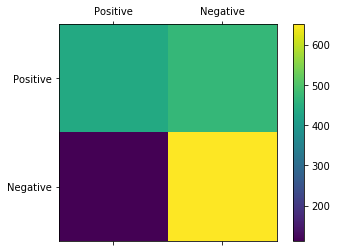

In [16]:
labels = ['Positive', 'Negative']

matrix = confusion_matrix(test_labels, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)

plt.show()

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('accuracy score = ', str(accuracy_score(test_labels, predictions)))
print('precision score = ', str(precision_score(test_labels, predictions)))
print('recall score = ', str(recall_score(test_labels, predictions)))
print('F1 score = ', str(f1_score(test_labels, predictions)))

accuracy score =  0.652355396541443
precision score =  0.5804444444444444
recall score =  0.8547120418848168
F1 score =  0.691371095817893


In [18]:
#test clasifier on sample essay
profile_test = '''I spend a lot of time thinking about my future and when I want kids.''' 
essay_count = counter.transform([profile_test])
print(classifier.predict(essay_count))

[1.]
